<a href="https://colab.research.google.com/github/AkarshAnilkumar/Machine_Learning/blob/main/Disease_Prediction/Disease_prediction_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**

**A decision tree is a graphical representation of all possible solutions to a decision.**

## Types of Decision Tree

### Classification Tree
**A classification tree is used when the dependent variable is categorical.**

### Regression Tree
**A regression tree is used when the dependent variable is continuous.**


**Together they are called as CART(classification and regression tree)**

## Gini Impurity Algorithm

> To select which column as a root node





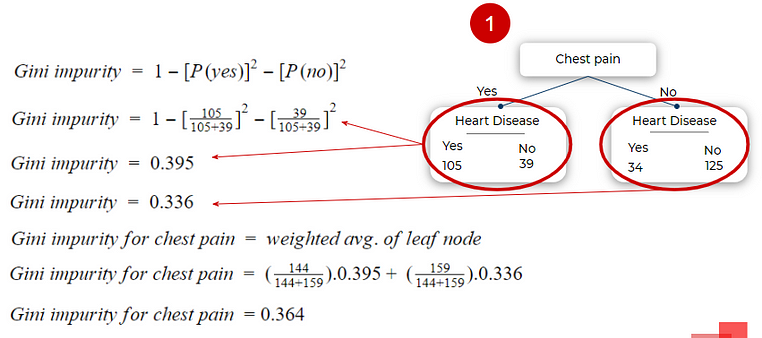

**We select the column or feature with minimum Gini impurity**

# **Implementation of Disease Prediction Chatbot using Decision Tree**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, mean_squared_error, auc, roc_curve

In [3]:
import joblib
from joblib import *

In [4]:
data = pd.read_csv('/content/drive/MyDrive/EKC_Hospital/Code/Training1.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
data.drop('Unnamed: 133', axis= 1, inplace=True)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
data.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [7]:
data.shape

(4920, 133)

In [8]:
zeros = joblib.load('/content/drive/MyDrive/EKC_Hospital/Code/zeros.pkl')
# zeros = pickle.load(open(filename, 'rb'))

In [9]:
target = data['prognosis']
X = data.drop('prognosis', axis= 1)


In [10]:
X.drop(columns=zeros, axis=1, inplace=True)
X.head()

,itching,weight_loss,loss_of_appetite,mild_fever,neck_pain,swollen_extremeties,slurred_speech,hip_joint_pain,movement_stiffness,unsteadiness,...,abnormal_menstruation,dischromic _patches,increased_appetite,rusty_sputum,lack_of_concentration,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,silver_like_dusting,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
LE = LabelEncoder()
target = LE.fit_transform(target)
target

array([15, 15, 15, ..., 38, 35, 27])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,target, random_state=42, test_size = 0.2)

In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = decision_tree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24
           3       1.00      0.92      0.96        25
           4       0.00      0.00      0.00        24
           5       1.00      0.83      0.90        23
           6       0.00      0.00      0.00        33
           7       0.95      0.87      0.91        23
           8       1.00      0.95      0.98        21
           9       0.32      0.80      0.45        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       0.00      0.00      0.00        29
          14       0.74      0.96      0.84        24
          15       1.00      0.84      0.91        19
          16       0.00      0.00      0.00        28
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
X.columns


Index(['itching', 'weight_loss', 'loss_of_appetite', 'mild_fever', 'neck_pain',
       'swollen_extremeties', 'slurred_speech', 'hip_joint_pain',
       'movement_stiffness', 'unsteadiness', 'loss_of_smell',
       'continuous_feel_of_urine', 'internal_itching', 'depression',
       'muscle_pain', 'altered_sensorium', 'belly_pain',
       'abnormal_menstruation', 'dischromic _patches', 'increased_appetite',
       'rusty_sputum', 'lack_of_concentration', 'fluid_overload.1',
       'blood_in_sputum', 'prominent_veins_on_calf', 'silver_like_dusting',
       'yellow_crust_ooze'],
      dtype='object')

In [ ]:
new_user_data = {}
print("Enter data of the new user to predict\n")
user_data = pd.DataFrame(columns=[column for column in X.columns])

for column in user_data.columns:
  value = int(input(f"Enter value for {column} : "))
  new_user_data[column] = value

# Use the loc method to add the new row to the DataFrame
user_data.loc[len(user_data)] = new_user_data
print("\nUser_data : \n\n",user_data)
user_pred = decision_tree.predict(user_data)
user_class = LE.inverse_transform(user_pred)
print("\nThe predicted status for the user is : ",user_class)

In [ ]:
# plt.figure(figsize = (20,20))
# dec_tree = plot_tree(decision_tree=decision_tree, feature_names = X.columns, 
#                      class_names =['itching', 'weight_loss', 'loss_of_appetite', 'mild_fever', 'neck_pain',
#        'swollen_extremeties', 'slurred_speech', 'hip_joint_pain',
#        'movement_stiffness', 'unsteadiness', 'loss_of_smell',
#        'continuous_feel_of_urine', 'internal_itching', 'depression',
#        'muscle_pain', 'altered_sensorium', 'belly_pain',
#        'abnormal_menstruation', 'dischromic _patches', 'increased_appetite',
#        'rusty_sputum', 'lack_of_concentration', 'fluid_overload.1',
#        'blood_in_sputum', 'prominent_veins_on_calf', 'silver_like_dusting',
#        'yellow_crust_ooze'] , filled = True , precision = 4, rounded = True)

# plt.savefig("one.png")
